In [1]:

##########################################################
#  Python script template for Question 3 (IAML Level 10)
#  Note that:
#  - You should not change the name of this file, 'iaml01cw2_q3.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import scipy
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import k_means
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import os
import sys
sys.path.insert(0, os.path.abspath('../helpers'))
from iaml01cw2_helpers import load_CoVoST2
print(sklearn.__version__)
# from iaml01cw2_my_helpers import *

0.19.1


/Users/jw/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/Users/jw/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


In [2]:
loc = "../data"
Xtrn,Ytrn,Xtst,Ytst = load_CoVoST2(loc)
print("Xtrn.shape",Xtrn.shape)
print("Ytrn.shape",Ytrn.shape)
print(set(Ytrn))

Xtrn.shape (22000, 26)
Ytrn.shape (22000,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}


In [3]:
lang = pd.read_csv("../data/languages.txt",sep="\s+",header=None)
lang.columns = ["labels","names","abbr"]
lang

,labels,names,abbr
0,0,Arabic,(Ar)
1,1,Catalan,(Ca)
2,2,Welsh,(Cy)
3,3,German,(De)
4,4,English,(En)
5,5,Spanish,(Es)
6,6,Estonian,(Et)
7,7,Persian,(Fa)
8,8,French,(Fr)
9,9,Indonesian,(Id)


In [4]:
#<----

# Q3.1
#def iaml01cw2_q3_1():
#
# iaml01cw2_q3_1()   # comment this out when you run the function

In [5]:
from sklearn.cluster import k_means
k_means = k_means(Xtrn,n_clusters=22,random_state=1)
cluster_centres = k_means[0]
label = k_means[1]
# the number of samples for each cluster
from collections import Counter
Counter(label)

Counter({5: 1332,
         14: 950,
         17: 845,
         21: 1466,
         11: 1276,
         15: 1971,
         2: 1191,
         20: 1065,
         6: 839,
         0: 1018,
         16: 1251,
         19: 930,
         9: 838,
         10: 659,
         8: 1400,
         13: 152,
         1: 1125,
         18: 896,
         3: 890,
         4: 1162,
         7: 623,
         12: 121})

In [6]:
# calculate squared distances of samples
distance_lis = []
for i in range(Xtrn.shape[0]):
    sample = Xtrn[i]
    cluster_centre = cluster_centres[label[i]]
    squared_distances = ((sample-cluster_centre)**2).sum()
    distance_lis.append(squared_distances)
sum_squared_distances = np.array(distance_lis).sum()
print(sum_squared_distances)

38185.816


In [7]:
# Q3.2
#def iaml01cw2_q3_2():
#
# iaml01cw2_q3_2()   # comment this out when you run the function

In [8]:
train = np.concatenate([Xtrn,Ytrn.reshape(-1,1)],axis=1)
test = np.concatenate([Xtst,Ytst.reshape(-1,1)],axis=1)

In [9]:
# mean vector for each language
mean_vector_matrix = np.zeros([22,26])
for i in range(22):
    train_each_lang = train[train[:,-1]==i]
    train_x = train_each_lang[:,:26]
    mean_vector = train_x.mean(axis=0)
    mean_vector_matrix[i,:26] = mean_vector

In [10]:
mean_vector_matrix.shape

(22, 26)

In [11]:
pca = PCA(n_components=2)
pca.fit(mean_vector_matrix[:,:26])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
# dimensionality reduction to mean_vector
pca_transformed = pca.transform(mean_vector_matrix[:,:26])
# dimensionality reduction to cluster centroid
cluster_centre_transform = pca.transform(cluster_centres)

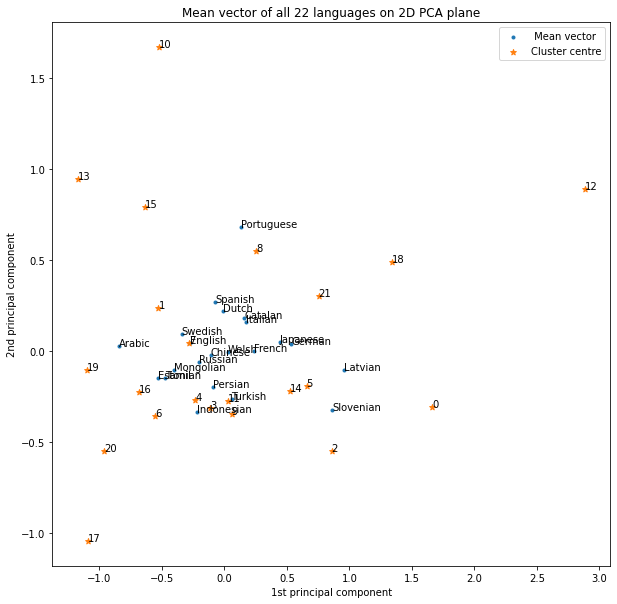

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_transformed[:,0],pca_transformed[:,1],label=" Mean vector", marker=".")
plt.scatter(cluster_centre_transform[:,0],cluster_centre_transform[:,1],label="Cluster centre", marker="*")
for i in range(22):
    plt.text(pca_transformed[i,0],pca_transformed[i,1],lang.iloc[i]['names'])
    plt.text(cluster_centre_transform[i,0],cluster_centre_transform[i,1],i)
plt.title("Mean vector of all 22 languages on 2D PCA plane")
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend()

In [14]:
# Q3.3
#def iaml01cw2_q3_3():
#
# iaml01cw2_q3_3()   # comment this out when you run the function

In [15]:
disMat = hierarchy.distance.pdist(mean_vector_matrix[:,:26],'euclidean') 

Text(0.5, 1.0, 'Dendrogram')

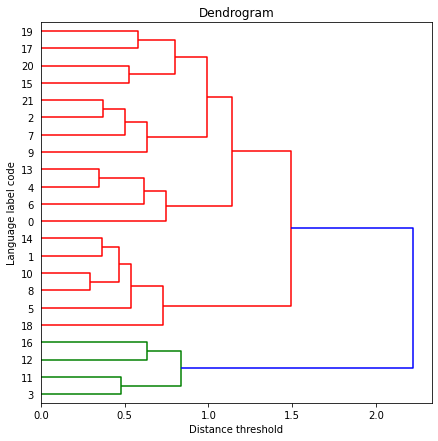

In [16]:
plt.figure(figsize=(7, 7))
Z=hierarchy.linkage(disMat,method='ward') 
# show the cluster by dendrogram
P=hierarchy.dendrogram(Z,orientation='right')
plt.xlabel("Distance threshold")
plt.ylabel("Language label code")
plt.title("Dendrogram")

In [17]:
# Q3.4
#def iaml01cw2_q3_4():
#
# iaml01cw2_q3_4()   # comment this out when you run the function

In [18]:
loc2 = "../data"
Xtrn,Ytrn,Xtst,Ytst = load_CoVoST2(loc2)

In [19]:
train = np.concatenate([Xtrn,Ytrn.reshape(-1,1)],axis=1)
test = np.concatenate([Xtst,Ytst.reshape(-1,1)],axis=1)

In [20]:
cluster_centre_matrix = np.zeros([66,26])

In [21]:
from sklearn.cluster import k_means
for i in range(22):
    # dataset for each language
    train_each_lang = train[train[:,-1]==i]
    x_train = train_each_lang[:,:26]
    # k_means
    k_mean = k_means(x_train,n_clusters=3,random_state=1)
    
    cluster_centre = k_mean[0] 
    cluster_centre_matrix[(3*i):(3*i+3),:] = cluster_centre

In [22]:
cluster_centre_matrix.shape

(66, 26)

In [23]:
label_lis = [i/3 for i in range(66)]
# column 27 is language label
disMat = hierarchy.distance.pdist(cluster_centre_matrix,'euclidean')

In [24]:
from math import floor
# same label with same language
label_lis = [floor(i/3) for i in range(66)]

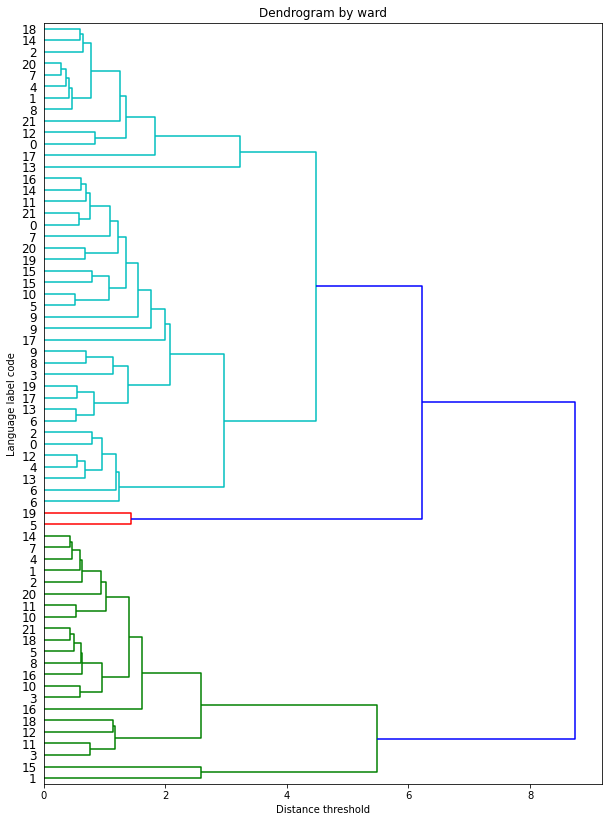

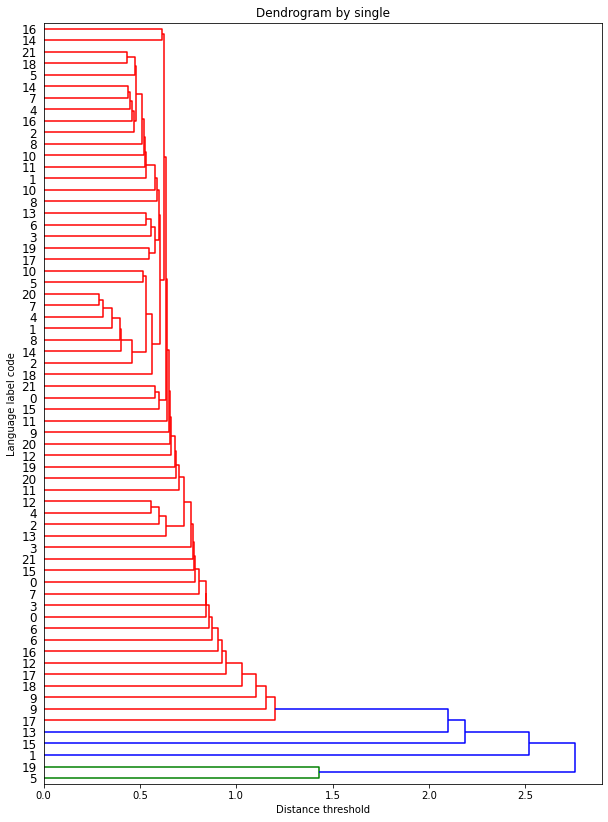

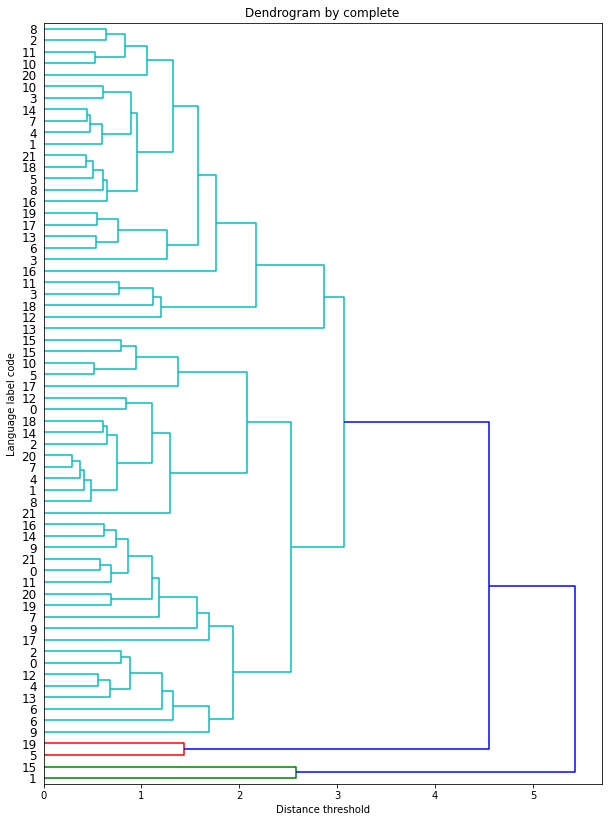

In [37]:
for method in ['ward','single','complete']:
    plt.figure(figsize=(10, 14))
    z = hierarchy.linkage(disMat,method=method) 
    # show the cluster by dendrogram
    p = hierarchy.dendrogram(z,orientation="right",labels=label_lis)
    plt.yticks(fontsize=12)
    plt.xlabel("Distance threshold")
    plt.ylabel("Language label code")
    plt.title("Dendrogram by " + method)
    plt.show()

In [26]:
# Q3.5
#def iaml01cw2_q3_5():
#
# iaml01cw2_q3_5()   # comment this out when you run the function

In [27]:
# data language = 0 
train_0 = train[train[:,-1]==0]
test_0 = test[test[:,-1]==0]

In [28]:
x_train = train_0[:,:26]
x_test = test_0[:,:26]

In [29]:
train_score = {'full':[],'diag':[]}
test_score = {'full':[],'diag':[]}
k_list =[1, 3, 5, 10, 15]

In [30]:
for covariance in ['full','diag']:
    for k in k_list:
        gm = GaussianMixture(n_components=k,covariance_type=covariance)
        gm.fit(X=x_train)
        # per-sample average log-likelihood
        train_score[covariance].append(round(gm.score(x_train),4))
        test_score[covariance].append(round(gm.score(x_test),4))

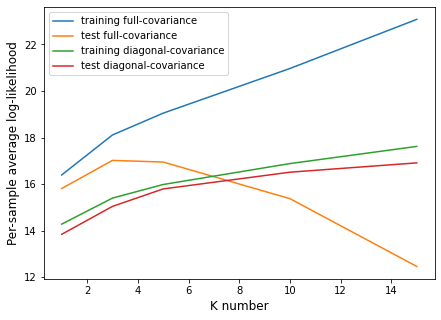

In [31]:
plt.figure(figsize=(7, 5))
plt.plot(k_list,train_score['full'],label="training full-covariance")
plt.plot(k_list,test_score['full'],label="test full-covariance")
plt.plot(k_list,train_score['diag'],label="training diagonal-covariance")
plt.plot(k_list,test_score['diag'],label="test diagonal-covariance")
plt.xlabel("K number",fontsize = 12)
plt.ylabel("Per-sample average log-likelihood",fontsize = 12)
plt.legend()
plt.show()

In [32]:
result = pd.DataFrame({"K":k_list,
                       "full-covariance train":train_score['full'],
                       "full-covariance test":test_score['full'],
                       "diagonal-covariance train":train_score['diag'],
                       "diagonal-covariance test":test_score['diag'],
                      })
result

,K,full-covariance train,full-covariance test,diagonal-covariance train,diagonal-covariance test
0,1,16.3936,15.8105,14.2804,13.8429
1,3,18.1099,17.0179,15.3985,15.0416
2,5,19.0472,16.9486,15.9822,15.7927
3,10,20.9671,15.3734,16.8820,16.5112
4,15,23.0776,12.4623,17.6196,16.9120
